In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the datasets

house = pd.read_csv('../datasets/train_clean.csv', index_col = 'id')
test = pd.read_csv('../datasets/test_clean.csv', index_col = 'id')

In [3]:
house.head(2)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf,age_sale,remod_age
id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,70.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,3,2010,WD,130500,2204.0,34,5
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,4,2009,WD,220000,3035.0,13,12


In [4]:
# add dummy variables for non-numeric fields.

variables = ['ms_zoning', 'street', 'lot_shape', 'land_contour', 'lot_config', 'land_slope',
             'neighborhood', 'bldg_type', 'house_style', 'foundation', 'condition_1', 'condition_2',
             'bsmt_qual', 'bsmt_cond', 'garage_type', 'kitchen_qual']

house_dummies = pd.get_dummies(house[variables], drop_first = True)
test_dummies = pd.get_dummies(test[variables], drop_first = True)

In [6]:
## find the columns that are in test, but are not in train

missing_columns_house = list(set(test_dummies) - set(house_dummies))

## find the columns that are in train, but are not in test

missing_columns_test  = list(set(house_dummies) - set(test_dummies))

print(f"Columns missing from House: \n{missing_columns_house}")
print(f"\nColumns missing from Test: \n{missing_columns_test}")

Columns missing from House: 
['ms_zoning_RH', 'ms_zoning_I (all)', 'kitchen_qual_Po', 'ms_zoning_FV', 'bsmt_qual_Po']

Columns missing from Test: 
['condition_2_RRNn', 'bsmt_cond_Po', 'condition_2_RRAn', 'neighborhood_Landmrk', 'condition_2_Feedr', 'condition_2_PosN', 'bsmt_cond_Fa', 'condition_2_RRAe', 'neighborhood_GrnHill']


In [7]:
## add the missing columns to the test_dummies dataframe
### since no rows in the test dataset have values for these new columns, fill them with 0's

for col in missing_columns_house:
    house_dummies[col] = 0

for col in missing_columns_test:
    test_dummies[col] = 0

In [8]:
## check to see that it worked

set(house_dummies) - set(test_dummies)

set()

In [9]:
## take a look at all the dummy columns created

house_dummies.columns

Index(['ms_zoning_RL', 'ms_zoning_RM', 'street_Pave', 'lot_shape_IR2',
       'lot_shape_IR3', 'lot_shape_Reg', 'land_contour_HLS',
       'land_contour_Low', 'land_contour_Lvl', 'lot_config_CulDSac',
       'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside',
       'land_slope_Mod', 'land_slope_Sev', 'neighborhood_Blueste',
       'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
       'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
       'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_V

In [10]:
# take a look at the dummy columns to see if they match

test_dummies.columns

Index(['ms_zoning_FV', 'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL',
       'ms_zoning_RM', 'street_Pave', 'lot_shape_IR2', 'lot_shape_IR3',
       'lot_shape_Reg', 'land_contour_HLS', 'land_contour_Low',
       'land_contour_Lvl', 'lot_config_CulDSac', 'lot_config_FR2',
       'lot_config_FR3', 'lot_config_Inside', 'land_slope_Mod',
       'land_slope_Sev', 'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
       'neighborhood_Greens', 'neighborhood_IDOTRR', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
       'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
       'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborh

In [11]:
house_dummies.shape

(1926, 93)

In [12]:
test_dummies.shape

(878, 93)

In [13]:
## join the train and test dummy columns back with the original dataframes
## add a polynomial feature with total_sf and overall_qual

house_full = house.join(house_dummies)
house_full['qual_sf'] = house_full['overall_qual'] * house_full['total_sf']

test_full  = test.join(test_dummies)
test_full['qual_sf'] = test_full['overall_qual'] * test_full['total_sf']

## make sure the columns in `test` are in the same order as the column in `house`

test_full = test_full[house_full.drop(columns = ['saleprice']).columns]

<Figure size 720x576 with 0 Axes>

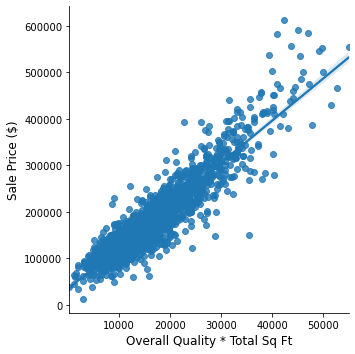

In [15]:
# plot the polynomial feature to sale price 

plt.figure(figsize = (10, 8))
sns.lmplot('qual_sf', 'saleprice', house_full)
plt.xlabel('Overall Quality * Total Sq Ft', size = 12)
plt.ylabel('Sale Price ($)', size = 12)
plt.savefig('../images/qual_sf.png');

In [16]:
# check the dataframes to see if the column numbers are correct

print(house_full.shape)
print(test_full.shape)

(1926, 173)
(878, 172)


In [18]:
# save the datasets

house_full.to_csv('../datasets/train_df.csv')
test_full.to_csv('../datasets/test_df.csv')